In [1]:

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=0)

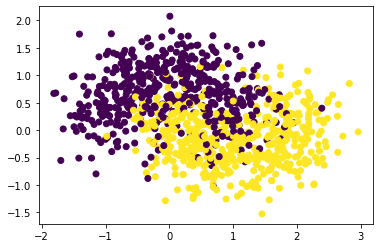

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

# Suffle training set

In [10]:
ss = ShuffleSplit(n_splits=1000, random_state=0, train_size=75, test_size=25)

# Train 1000 Trees

In [6]:
accuracy = 0
total_acc = 0

for train, test in ss.split(X):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    
    model = DecisionTreeClassifier(random_state=0, max_depth=5, max_leaf_nodes=5,
                                    min_samples_split=2)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    #print(accuracy)

    total_acc = total_acc + accuracy

mean_acc = total_acc / ss.get_n_splits()
print("mean_acc:", mean_acc)

mean_acc: 0.836


# FOREST

Train 1000 models

In [11]:
model_forest = []

for train, test in ss.split(X):
    X_train = X[train]
    y_train = y[train]
    
    model = DecisionTreeClassifier(random_state=0, max_depth=5, max_leaf_nodes=5,
                                    min_samples_split=2)
    model.fit(X_train, y_train)

    model_forest.append(model)

In [12]:
print(len(model_forest))

1000


Predict the test sets on the forest and get mode predictions

In [13]:
total_acc = 0

for train, test in ss.split(X):
    
    X_test = X[test]
    y_test = y[test]

    predictions = []

    # predict on every model
    for model in model_forest:
        y_test_pred = model.predict(X_test)
        predictions.append(y_test_pred)
    
    # get most frecuent prediction
    y_test_pred = stats.mode(predictions, axis=0)
    
    accuracy = accuracy_score(y_test, y_test_pred.mode[0])

    total_acc = total_acc + accuracy

mean_acc = total_acc / ss.get_n_splits()
print("mean_acc:", mean_acc)   

mean_acc: 0.8620399999999958
